<a href="https://colab.research.google.com/github/VISHAL1SELVAM/BHARATINTERN/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digit Recognizer

Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Import Dataset

In [9]:
data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [10]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
features = data.drop(["label"], axis=1)
labels = data ['label']

Split the dataset

In [13]:
x_train,x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,random_state=42)

In [14]:
features

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [16]:
print(features.describe())
labels.describe()

        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  42000.0  42000.0  ...  42000.000000  42000.000000  42000.000000   
mean       0.0      0.0  ...      0.219286      0.117095      0.059024   
std        0.0      0.0  ...      6.312890      

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [17]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [20]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [21]:
len(x_train)

33600

In [22]:
x_train.loc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [23]:
y_train[0]

1

In [24]:
y_train[10]

8

In [25]:
labels.loc[20]

8

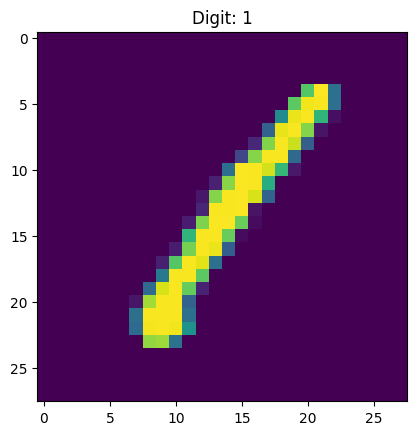

In [26]:
img = x_train.loc[0].values.reshape(28,28)
plt.title('Digit: '+ str(y_train[0]))
plt.imshow(img)

In [27]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

33600
33600
8400
8400


In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [30]:
features.shape

(42000, 784)

In [31]:
x_train = x_train /255
x_test = x_test /255

In [32]:
x_train.loc[0].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation= 'relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [34]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model_weights.h5', save_weights_only=True),
    keras.callbacks.History()
]
history = model.fit(x_train, y_train, epochs=20, callbacks=callbacks)

epoch_accuracy = history.history['accuracy']
np.save('epoch_accuracy.npy', epoch_accuracy)

Epoch 1/20
1050/1050 [==============================] - 9s 6ms/step - loss: 0.3083 - accuracy: 0.9052
Epoch 2/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1234 - accuracy: 0.9626
Epoch 3/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0877 - accuracy: 0.9734
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0679 - accuracy: 0.9790
Epoch 5/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0555 - accuracy: 0.9830
Epoch 6/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0446 - accuracy: 0.9863
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0442 - accuracy: 0.9867
Epoch 8/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 9/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0301 - accuracy: 0.9911
Epoch 10/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.025

In [36]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

263/263 [==============================] - 2s 5ms/step - loss: 0.1453 - accuracy: 0.9740
Test loss:  0.14534391462802887
Test accuracy:  0.9740476012229919


In [37]:
test_predictions = model.predict(x_test)
test_predictions[0]

263/263 [==============================] - 1s 5ms/step


array([1.6779821e-10, 4.2978834e-10, 5.8249103e-08, 2.5461956e-08,
       1.5846435e-11, 1.1327137e-08, 3.3394537e-10, 5.0738916e-13,
       9.9999982e-01, 1.5715466e-08], dtype=float32)

In [38]:
np.argmax(test_predictions[0])

8

In [39]:
y_test[:5]

5457     8
38509    1
25536    9
31803    9
39863    8
Name: label, dtype: int64

In [40]:
predicted_labels = [np.argmax(i) for i in test_predictions]
predicted_labels[:5]

[8, 1, 9, 9, 8]

In [41]:
test_predictions = model.predict(x_test)
predicted_labels = np.argmax(test_predictions, axis=1)

263/263 [==============================] - 1s 4ms/step


In [42]:
correct_predictions = np.sum(predicted_labels == y_test)
total_samples = len(y_test)

Calculate Accuracy

In [43]:
accuracy = accuracy_score(y_test, predicted_labels)
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.974047619047619


Calculate Precision

In [44]:
precision = precision_score(y_test, predicted_labels, average= 'weighted')
print('Precision: ',precision)

Precision:  0.9742165349517273


Calculate recall

In [45]:
recall = recall_score(y_test, predicted_labels, average= 'weighted')
print('recall: ',recall)

recall:  0.974047619047619


Calculate F1-score

In [46]:
f1 = f1_score(y_test, predicted_labels, average= 'weighted')
print('F1_Score: ',f1)

F1_Score:  0.9740474834617812


Calculate Confusion Matrix

In [47]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
print('Confusion Matrix: ', conf_matrix)

Confusion Matrix:  [[800   0   3   1   0   1   2   0   3   6]
 [  0 903   3   0   0   0   0   2   1   0]
 [  1   6 821   2   5   0   0   6   5   0]
 [  0   1   4 894   0  12   0  14   5   7]
 [  1   1   2   0 811   0   4   8   1  11]
 [  1   0   1  10   0 681   3   1   1   4]
 [  5   3   1   0   0   2 773   0   1   0]
 [  0   1   4   0   1   1   0 881   0   5]
 [  0   7   6   3   1   8   2   3 801   4]
 [  0   1   1   2   5   3   0   8   1 817]]


In [48]:
model.load_weights('model_weights.h5')

In [49]:
np.load('epoch_accuracy.npy')

array([0.90523809, 0.96258926, 0.9733631 , 0.97901785, 0.98303574,
       0.98633927, 0.98669642, 0.98895836, 0.9910714 , 0.99208331,
       0.99130952, 0.99264878, 0.99294645, 0.99395835, 0.99511904,
       0.99431551, 0.99565476, 0.99541664, 0.99690479, 0.99571431])